# Assignment Week 5-6 Data Wrangling with Python: Activity 7 & 8

''' 
Name : Karthikeyan Chellamuthu 

Date : 04-24-2022
'''

#### ACTIVITY 7: READING TABULAR DATA FROM A WEB PAGE AND CREATING DATAFRAMES

In [1]:
#Importing all the libraries required for this exercise
#BeautifulSoup library for reading html web pages
#Pandas library for creating dataframe
#Codecs library for reading the html file - data source with utf-8 format

from bs4 import BeautifulSoup
import pandas as pd
import codecs

In [2]:
# 2. Read the page using bs4

fd = codecs.open("List of countries by GDP (nominal) - Wikipedia.htm","r",'utf-8')
soup = BeautifulSoup(fd)
fd.close()

In [3]:
# 3.Find the table structure you will need to deal with (how many tables there are?)

all_tables = soup.find_all("table")
print("Total number of tables: {} ".format(len(all_tables)))

Total number of tables: 9 


In [4]:
# 4. Find the right table using bs4
## 'wikitable' is the class of the tables consisting of required GDP data. So class attribute named wikitable should be loaded.
## data_table will be holding the data and headers related to all wikitables
## So, we will be storing this information from all wikitables first
## Printing how many such wikitables are present as well as type of information stored

data_table = soup.find("table", {"class": '"wikitable"|}'})
print('Length of data_table is: {}'.format(len(data_table)))
print('Type of data_table is: {}'.format(type(data_table)))

Length of data_table is: 2
Type of data_table is: <class 'bs4.element.Tag'>


In [5]:
# 5. Separate the source names and their corresponding data
# Printing the data_table to see the formatting and decide on how to navigate through the data further

print(data_table)

<table class='"wikitable"|}' style="margin:auto; width:100%;">
<tbody><tr>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2017)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
</td>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">World Bank</a> (2017)</b><sup class="reference" id="cite_ref-worldbank_20-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">[20]</a></sup>
</td>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/United_Nations" title="United Nations">United Nations</a> (2016)</b><sup class="reference" id="cite_ref-21"><a href="https://en.wikipedia.org/wiki/List

In [6]:
# At high level, data is organized in the below structure
##<thead>
##    <tr>
##       <th>    </th>
##       <th>    </th>
##    </tr>
## </thead>
## <tbody>
##    <tr>
##      <td>  </td>
##      <td>  </td>
##    </tr>
## </tbody>

tables = data_table.tbody.findAll('tr', recursive=False)[0]
tables_list = [td for td in tables.find_all('td')] 
print(f'Total number of table names present within first wiki table is: {len(tables_list)}')


Total number of table names present within first wiki table is: 3


In [7]:
## As mentioned earlier, data_table consists of the headers and data information related to all wikitables.
## we will be reading through this data_table. will be using find_all() method to search through the data.
## first occurence of 'tr' element within 'tbody' has the data from the first table.
## Further to this, the bunch of 'td' elements within the 'tr' elements can help us with segregating GDP wikitable data next

data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [8]:
print(data)

[<td>
<table class="wikitable sortable jquery-tablesorter" style="margin-left:auto; margin-right:auto; margin-top:0;">
<thead><tr>
<th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$MM)
</th></tr></thead><tbody>
<tr style="font-weight:bold;background:#eaecf0">
<td data-sort-value="-1"> </td>
<td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_19-1"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-19">[19]</a></sup></td>
<td align="right">79,865,481
</td></tr>
<tr>
<td align="right">1<

In [9]:
## Define an empty list to store the data from three of the wikitables.
## Segregate all the 'wikitable' tables data into list of wikitables i.e. into data_table_list
## This is done through the 'data' source created previously, consisting of all 'td' elements

data_table_list = []

for td in data:
    data_table_list.append(td.find_all('table'))

print('Number of data tables: {}'.format(len(data_table_list)))
print(data_table_list)

Number of data tables: 3
[[<table class="wikitable sortable jquery-tablesorter" style="margin-left:auto; margin-right:auto; margin-top:0;">
<thead><tr>
<th class="headerSort" data-sort-type="number" role="columnheader button" style="width:2em;" tabindex="0" title="Sort ascending">Rank</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">Country</th>
<th class="headerSort" role="columnheader button" tabindex="0" title="Sort ascending">GDP<br/>(US$MM)
</th></tr></thead><tbody>
<tr style="font-weight:bold;background:#eaecf0">
<td data-sort-value="-1"> </td>
<td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_19-1"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-19">[19]</a></sup></td>
<td align="right">79,865,481
</td></tr>
<tr>

In [10]:
## The element type 'a' consists of the table names i.e. source names. [0] occurence of element 'a' has table names
## to find out the source names, we will use getText() method
## getText() method extracts the text from title field element

table_names = [table.findAll('a')[0].getText() for table in tables_list]
print(f'Names of the GDP wikitables are : {table_names}')

Names of the GDP wikitables are : ['International Monetary Fund', 'World Bank', 'United Nations']


##### Processing data for International Monetary Fund table

In [11]:
# 7. Separate the header and data from the data 
#    that you separated before for the first source only, and then create a DataFrame using that
#    Extracting the columns present in the dataset

header1 = [th.getText().strip() for th in data_table_list[0][0].findAll('thead')[0].findAll('th')]
print('Columns present for First GDP table (International Monetary Fund): {}'.format(header1))

Columns present for First GDP table (International Monetary Fund): ['Rank', 'Country', 'GDP(US$MM)']


In [12]:
# Extracting the actual data for IMF

rows1 = data_table_list[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [13]:
## Below is the second part of this process, where we extract the actual Column names

data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
print('Data part within First GDP tables are : {}'.format(data_rows1))

Data part within First GDP tables are : [['1', 'United States', '19,390,600'], ['2', 'China[n 1]', '12,014,610'], ['3', 'Japan', '4,872,135'], ['4', 'Germany', '3,684,816'], ['5', 'United Kingdom', '2,624,529'], ['6', 'India', '2,611,012'], ['7', 'France', '2,583,560'], ['8', 'Brazil', '2,054,969'], ['9', 'Italy', '1,937,894'], ['10', 'Canada', '1,652,412'], ['11', 'South Korea', '1,538,030'], ['12', 'Russia[n 2]', '1,527,469'], ['13', 'Australia', '1,379,548'], ['14', 'Spain', '1,313,951'], ['15', 'Mexico', '1,149,236'], ['16', 'Indonesia', '1,015,411'], ['17', 'Turkey', '849,480'], ['18', 'Netherlands', '825,745'], ['19', 'Saudi Arabia', '683,827'], ['20', 'Switzerland', '678,575'], ['21', 'Argentina', '637,717'], ['22', 'Taiwan', '579,302'], ['23', 'Sweden', '538,575'], ['24', 'Poland', '524,886'], ['25', 'Belgium', '494,733'], ['26', 'Thailand', '455,378'], ['27', 'Iran', '431,920'], ['28', 'Austria', '416,845'], ['29', 'Norway', '396,457'], ['30', 'United Arab Emirates', '377,435'

In [14]:
# format the data rows and columns extracted from first wikitable - "International Monetory Fund", into a DataFrame
# Then we will print initial few rows with head() method

df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


##### Processing data for World Bank table

In [15]:
## Extracting the header for world bank table
# Extracting the actual column names from the above dataset

header2 = [th.getText().strip() for th in data_table_list[1][0].findAll('thead')[0].findAll('th')]
print('Column Names within Second GDP tables are : {}'.format(header2))

Column Names within Second GDP tables are : ['Rank', 'Country', 'GDP(US$MM)']


In [17]:
# Extracting the rows from the above dataset

rows2 = data_table_list[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [18]:
## Method to remove the unwanted text from the variable values

def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [19]:
## Below is the second part of this process, where we extract the actual values for the dataframe

data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
print('Data part within 2nd GDP table are : {}'.format(data_rows2))

Data part within 2nd GDP table are : [['1', 'United States', '19,390,604'], ['', 'European Union[23]', '17,277,698'], ['2', 'China[n 4]', '12,237,700'], ['3', 'Japan', '4,872,137'], ['4', 'Germany', '3,677,439'], ['5', 'United Kingdom', '2,622,434'], ['6', 'India', '2,597,491'], ['7', 'France', '2,582,501'], ['8', 'Brazil', '2,055,506'], ['9', 'Italy', '1,934,798'], ['10', 'Canada', '1,653,043'], ['11', 'Russia[n 2]', '1,577,524'], ['12', 'South Korea', '1,530,751'], ['13', 'Australia', '1,323,421'], ['14', 'Spain', '1,311,320'], ['15', 'Mexico', '1,149,919'], ['16', 'Indonesia', '1,015,539'], ['17', 'Turkey', '851,102'], ['18', 'Netherlands', '826,200'], ['19', 'Saudi Arabia', '683,827'], ['20', 'Switzerland', '678,887'], ['21', 'Argentina', '637,590'], ['22', 'Sweden', '538,040'], ['23', 'Poland', '524,510'], ['24', 'Belgium', '492,681'], ['25', 'Thailand', '455,221'], ['26', 'Iran', '439,514'], ['27', 'Austria', '416,596'], ['28', 'Norway', '398,832'], ['29', 'United Arab Emirates',

In [20]:
## format the data rows and columns extracted from 2nd wikitable - "World Bank", into a DataFrame
## Then we will print initial few rows with head() method

df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


##### Processing data for United Nation table

In [21]:
# Extracting the actual column names from the above dataset

header3 = [th.getText().strip() for th in data_table_list[2][0].findAll('thead')[0].findAll('th')]
print('Column Names within Second GDP tables are : {}'.format(header3))

Column Names within Second GDP tables are : ['Rank', 'Country', 'GDP(US$MM)']


In [23]:
# Extracting the rows from the above dataset

rows2 = data_table_list[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [24]:
## Below is the third part of this process, where we extract the actual values for the dataframe

data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
print('Data part within 3rd GDP table are : {}'.format(data_rows3))

Data part within 3rd GDP table are : [['1', 'United States', '18,624,475'], ['2', 'China[n 4]', '11,218,281'], ['3', 'Japan', '4,936,211'], ['4', 'Germany', '3,477,796'], ['5', 'United Kingdom', '2,647,898'], ['6', 'France', '2,465,453'], ['7', 'India', '2,259,642'], ['8', 'Italy', '1,858,913'], ['9', 'Brazil', '1,795,925'], ['10', 'Canada', '1,529,760'], ['11', 'South Korea', '1,411,245'], ['12', 'Australia', '1,304,463'], ['13', 'Russia[n 2]', '1,246,015'], ['14', 'Spain', '1,237,255'], ['15', 'Mexico', '1,076,914'], ['16', 'Indonesia', '932,259'], ['17', 'Turkey', '863,711'], ['18', 'Netherlands', '777,227'], ['19', 'Switzerland', '668,851'], ['20', 'Saudi Arabia', '639,617'], ['21', 'Argentina', '545,866'], ['22', 'Sweden', '514,475'], ['23', 'Poland', '471,402'], ['24', 'Belgium', '467,955'], ['25', 'Iran', '425,402'], ['26', 'Thailand', '407,026'], ['27', 'Nigeria', '404,649'], ['28', 'Austria', '390,799'], ['29', 'Norway', '371,068'], ['30', 'United Arab Emirates', '399,451'], [

In [25]:
## format the data rows and columns extracted from 3rd wikitable - "United Nations", into a DataFrame
## Then we will print initial few rows with head() method

df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China[n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"


#### Activity 8: Handling Outliers and Missing Data

In [26]:
# Importing pandas, numpy and matplotlib required for activity 8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# 1. Read the visit_data.csv file.
# Creating a dataframe for the input csv file

df_visit = pd.read_csv('visit_data.csv')

In [29]:
# Print few sample rows using head() function

df_visit.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [31]:
# checking the size of the data : rows and columns

df_visit.shape

(1000, 7)

In [33]:
# 2. Check for duplicates.

#Number of duplicates in each field
## Try to find duplicates in the columns first_name, last_name, email and ip_address using duplicated method
## value_counts() provides the counts of duplicate values in a given column.
## using the filter to check the True values (indicated with 1) returned from duplicated() function, to identify counts.

print('Number of duplicates in the First Name field: {}'.format(df_visit.first_name.duplicated().sum()))
print('Number of duplicates in the Last Name field: {}'.format(df_visit.last_name.duplicated().sum()))

print('Number of duplicates in the Email field: {}'.format(df_visit.email.duplicated().sum()))
print('Number of duplicates in the IP Address field: {}'.format(df_visit.ip_address.duplicated().sum()))

Number of duplicates in the First Name field: 320
Number of duplicates in the Last Name field: 299
Number of duplicates in the Email field: 0
Number of duplicates in the IP Address field: 0


In [34]:
# Number of duplicate rows

print('Number of duplicates rows present in the dataset: {}'.format(df_visit.duplicated().sum()))

Number of duplicates rows present in the dataset: 0


There are duplicates present in first and last name, whereas there is no duplicate value present in email and ip address fields. However, when we consider the entire row, there is no duplicates present.

In [35]:
# 3.Check if any essential column contains NaN.

## Detect NaN values in all the data columns present in the csv.
## Isnull() method can be used to detect NaNs i.e. Null values.
## using the filter to check the True values (indicated with 1) returned from isnull() function, to identify counts.

print('Number of NaN in the First Name field: {}'.format(df_visit.first_name.isnull().sum()))
print('Number of NaN in the Last Name field: {}'.format(df_visit.last_name.isnull().sum()))

print('Number of NaN in the Email field: {}'.format(df_visit.email.isnull().sum()))
print('Number of NaN in the Gender field: {}'.format(df_visit.gender.isnull().sum()))

print('Number of NaN in the IP Address field: {}'.format(df_visit.ip_address.isnull().sum()))
print('Number of NaN in the Visit field: {}'.format(df_visit.visit.isnull().sum()))

Number of NaN in the First Name field: 296
Number of NaN in the Last Name field: 296
Number of NaN in the Email field: 0
Number of NaN in the Gender field: 505
Number of NaN in the IP Address field: 0
Number of NaN in the Visit field: 26


In [36]:
# 4. Get rid of the outliers.

## From above output, we see visit column is the meaningful numeric value data and consists of NaN values. 
## So, such records need to be dropped off from the further analysis.
## ip_address and email columns do not consist of any NaN values.
## first_name, last_name may not be necessary for further analysis.

new_visit_df = df_visit[df_visit.visit.isnull() != 1]
new_visit_df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [37]:
new_visit_df.shape

(974, 7)

After dropping the rows / records with NaN values in the visit column, we created a new dataframe. The output dataframe has 974 records as compared with original csv file consisting of 1000 records.

In [38]:
# 5. Report the size difference.
## Calculating the difference of original dataframe and new dataframe

df_visit.shape[0] - new_visit_df.shape[0]

26

{'whiskers': [<matplotlib.lines.Line2D at 0x140e785cf70>,
 'caps': [<matplotlib.lines.Line2D at 0x140e987a610>,
 'boxes': [<matplotlib.lines.Line2D at 0x140e785cbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x140e987ad30>],
 'fliers': [<matplotlib.lines.Line2D at 0x140e9888100>],
 'means': []}

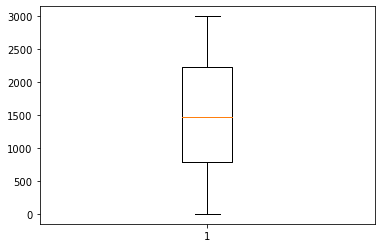

In [39]:
# 6. Create a box plot to check for outliers.

## Boxplots are useful to visualize the shape of the data. It can help in locating any 
## potential outliers and with the help of it, we can look to clean up data to delete outliers.

plt.boxplot(new_visit_df.visit)

In [40]:
## In addition, describe() method gives us useful characteristics like count, min, max, mean and quartiles numbers. 

new_visit_df.visit.describe()

count     974.000000
mean     1497.976386
std       838.959460
min         1.000000
25%       794.500000
50%      1477.000000
75%      2224.250000
max      2998.000000
Name: visit, dtype: float64

##### Method 1 to identifier outliers

In [41]:
#zscore method to find if the data has any outliers 

from scipy import stats
cos_arr_z_score = stats.zscore(new_visit_df.visit)

In [42]:
# Printing zscores

cos_arr_z_score

0     -0.325542
1     -0.690467
2     -1.463249
3     -0.591484
4      1.116269
         ...   
994   -0.895588
995   -0.230137
996    1.231948
998   -1.488293
999    1.062604
Name: visit, Length: 974, dtype: float64

In [43]:
#Any data point with a z-score greater than +3 or less then -3 is considered an outlier
#Creating dataframe with zscore filter conditions

cos_arr_without_outliers = new_visit_df[(cos_arr_z_score < 3)]

In [44]:
# Identifying the shape of dataframe to see if any record has been filtered out as part of outliers

cos_arr_without_outliers.shape

(974, 7)

Using zscore method, we could see that there is no outliers to be filtered out in the data

##### Method 2 to identify outliers

Looking at the box plot, we will use reference mainly 25% and 75% values, where most of the data is located.
25% value is 794.5 and 75% value is 2224.25.

In [46]:
## We will look to use minimum value of 150 and maximum value of 2900 as our potential valid range of values for visit column.
## any other values outside this range will be considered as potential outliers for this exercise.

cleaned_visit_df = df_visit[(df_visit.visit >= 150) & (df_visit.visit <= 2900)]

In [47]:
## shape function provides the number of rows and columns information

cleaned_visit_df.shape

(907, 7)

Looking at above, with certain assumption about potential outlier values (as values below 150 and values above 2900 considered as outliers), we can see that the clean dataframe has 907 rows in it

#### Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

In [65]:
# Importing sqlite3 library for database objects

import sqlite3

In [81]:
# Insert data into a SQL Lite database, Create a table

query = """
CREATE TABLE personal_info
(Name VARCHAR(20), 
 Address VARCHAR(35), 
 City VARCHAR(10), 
 State VARCHAR(2), 
 Zip NUM(5), 
 Phone Number NUM(10)
 );"""

con = sqlite3.connect('mydata.sqlite') # Connect to server
con.execute(query)                     # Commented as table is already created
con.commit()                           # Commit changes

In [82]:
# 10 dummy records to be inserted into employee table.

data = [('Karthik Chellamuthu', '809 S 70th Plz', 'Omaha', 'NE', 68106, 9883737337),
        ('Arun Kumar', '809 S 70th Plz', 'Omaha', 'NE', 68106, 2345678912),
        ('Anitha Saminathan', '929 N 82nd plz', 'Ralston', 'NE', 68126, 3434789123),
        ('Ranjith Kumar', '7510 Lakeview Ct', 'La Vista', 'NE', 68951, 4567481234),
        ('Santosh ram', '7998 Pacific St', 'Omaha', 'NE', 68106, 5670002345),
        ('Eric Vace', '1122 Dodge St', 'Omaha', 'NE', 68107, 5673412345),
        ('Soledad Wells', '1855 W Center St', 'Omaha', 'NE', 68116, 9670912345),
        ('Less Swamy', '58 Harrison St', 'Omaha', 'NE', 69116, 6678910345),
        ('Stevens Austin', '6855 Pacific St', 'Omaha', 'NE', 68106, 7600012345),
        ('Dan will', '849 Crosswinds apt', 'Omaha', 'NE', 68160, 8678912005)]


In [83]:
# Inserting data into the table

stmt = "INSERT INTO personal_info VALUES(?, ?, ?, ?, ?, ?)"

In [84]:
# Statement to insert all the data rows into the employee table

con.executemany(stmt, data)
con.commit()

In [85]:
# Display the content of database
cursor = con.execute('select * from personal_info')
rows = cursor.fetchall()
rows

[('Karthik Chellamuthu', '809 S 70th Plz', 'Omaha', 'NE', 68106, 9883737337),
 ('Arun Kumar', '809 S 70th Plz', 'Omaha', 'NE', 68106, 2345678912),
 ('Anitha Saminathan', '929 N 82nd plz', 'Ralston', 'NE', 68126, 3434789123),
 ('Ranjith Kumar', '7510 Lakeview Ct', 'La Vista', 'NE', 68951, 4567481234),
 ('Santosh ram', '7998 Pacific St', 'Omaha', 'NE', 68106, 5670002345),
 ('Eric Vace', '1122 Dodge St', 'Omaha', 'NE', 68107, 5673412345),
 ('Soledad Wells', '1855 W Center St', 'Omaha', 'NE', 68116, 9670912345),
 ('Less Swamy', '58 Harrison St', 'Omaha', 'NE', 69116, 6678910345),
 ('Stevens Austin', '6855 Pacific St', 'Omaha', 'NE', 68106, 7600012345),
 ('Dan will', '849 Crosswinds apt', 'Omaha', 'NE', 68160, 8678912005)]

In [88]:
## description attribute for getting the column names

cursor.description

(('Name', None, None, None, None, None, None),
 ('Address', None, None, None, None, None, None),
 ('City', None, None, None, None, None, None),
 ('State', None, None, None, None, None, None),
 ('Zip', None, None, None, None, None, None),
 ('Phone', None, None, None, None, None, None))

In [86]:
# Write data from database into a pandas dataframe

DF_Tab = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
DF_Tab

,Name,Address,City,State,Zip,Phone
0,Karthik Chellamuthu,809 S 70th Plz,Omaha,NE,68106,9883737337
1,Arun Kumar,809 S 70th Plz,Omaha,NE,68106,2345678912
2,Anitha Saminathan,929 N 82nd plz,Ralston,NE,68126,3434789123
3,Ranjith Kumar,7510 Lakeview Ct,La Vista,NE,68951,4567481234
4,Santosh ram,7998 Pacific St,Omaha,NE,68106,5670002345
5,Eric Vace,1122 Dodge St,Omaha,NE,68107,5673412345
6,Soledad Wells,1855 W Center St,Omaha,NE,68116,9670912345
7,Less Swamy,58 Harrison St,Omaha,NE,69116,6678910345
8,Stevens Austin,6855 Pacific St,Omaha,NE,68106,7600012345
9,Dan will,849 Crosswinds apt,Omaha,NE,68160,8678912005
